In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
file_path = "results\\comparison-results\\comparison_hv.xlsx"
df = pd.read_excel(file_path)

Analyze only NSGA2 with Set1 and SPEA2 with Set2 (the optimal parameter set for each algorithm)

- Reduces noise from non-optimal parameter sets

- Focuses on evaluating algorithm performance under the best conditions

- However, it cannot assess the sensitivity of the algorithms to other parameter sets

# Preprocessing

In [ ]:
df["size"] = df["size"].apply(lambda x: x.split(".")[0])
df = df.rename(columns={'size': 'dataset'})
df.drop("Source_File", axis=1)

# Calculate average_ob1 and average_ob2
df["average_ob1"] = df["ob1"].apply(lambda x: np.mean(eval(x)) if isinstance(x, str) else np.mean(x))
df["average_ob2"] = df["ob2"].apply(lambda x: np.mean(eval(x)) if isinstance(x, str) else np.mean(x))

# # Calculate percentage_non_dominated
# df["percentage_non_dominated"] = df["num_solution"] / df["pop_size"]

In [14]:
# Remove rows where (algorithm == 'nsga2' and set_params == 'set2') or (algorithm == 'spea2' and set_params == 'set1')
df = df[~((df['algorithm'] == 'nsga2') & (df['set_params'] == 'set2'))]
df = df[~((df['algorithm'] == 'spea2') & (df['set_params'] == 'set1'))]

In [ ]:
algorithm_mapping = {
    "nsga2": "NSGA-II",
    "spea2": "SPEA2",
}

df["algorithm"] = df["algorithm"].replace(algorithm_mapping)

<ipython-input-15-57730da36dba>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["algorithm"] = df["algorithm"].replace(algorithm_mapping)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 359
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   run_time        180 non-null    float64
 1   pop_size        180 non-null    int64  
 2   num_gen         180 non-null    int64  
 3   crossover_rate  180 non-null    float64
 4   mutation_rate   180 non-null    float64
 5   crossover_type  180 non-null    object 
 6   mutation_type   180 non-null    object 
 7   num_solution    180 non-null    int64  
 8   front           180 non-null    object 
 9   ob1             180 non-null    object 
 10  ob2             180 non-null    object 
 11  Source_File     180 non-null    object 
 12  algorithm       180 non-null    object 
 13  set_params      180 non-null    object 
 14  num_gen.1       180 non-null    object 
 15  dataset         180 non-null    object 
 16  max_ob1         180 non-null    float64
 17  min_ob1         180 non-null    float64


# Descriptive Statistics

Descriptive statistics of Hypervolume, Run Time, and Percentage of Pareto solutions for each algorithm.

In [17]:
# Group data by algorithm and then describe
def describe_by_algorithm(df):
    for algorithm in df['algorithm'].unique():
        print(f"\nDescriptive Statistics for {algorithm}:")
        subset = df[df['algorithm'] == algorithm]
        print(subset[["hypervolume", "run_time"]].describe())

describe_by_algorithm(df)


Descriptive Statistics for NSGA-II:
       hypervolume    run_time
count    90.000000   90.000000
mean      0.730237   33.499776
std       0.056920   34.358158
min       0.600542    4.223434
25%       0.685319    8.940555
50%       0.742620   20.998883
75%       0.762496   54.101428
max       0.846327  149.275135

Descriptive Statistics for SPEA2:
       hypervolume   run_time
count    90.000000  90.000000
mean      0.542390  27.930349
std       0.100194  21.242151
min       0.303913   4.406414
25%       0.479364   9.854087
50%       0.535264  18.260128
75%       0.623907  51.156889
max       0.712415  76.109278


Check the distribution of hypervolume, run time, and number of solutions between NSGA2 and SPEA2

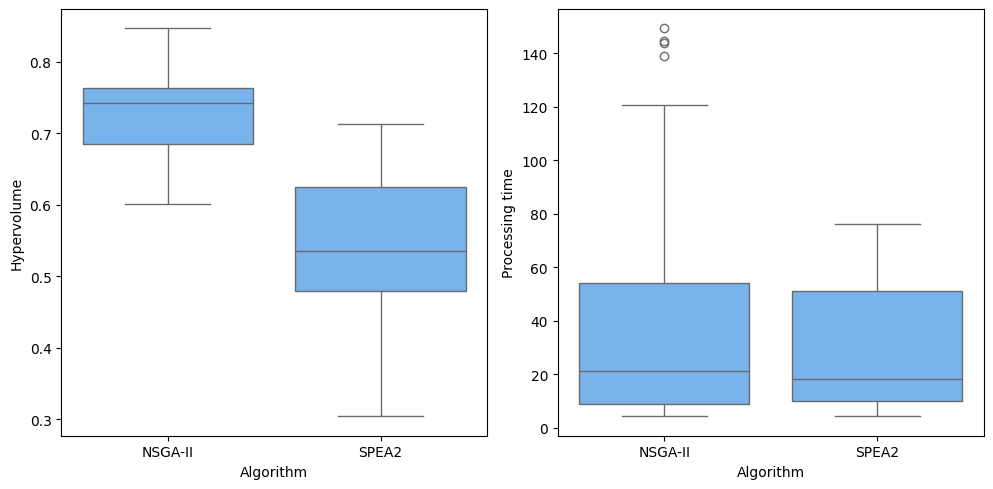

In [ ]:
# Visualization (Boxplots)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="algorithm", y="hypervolume", color="#66b3ff")
plt.xlabel("Algorithm")
plt.ylabel("Hypervolume")
# plt.title("Hypervolume distribution")

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="algorithm", y="run_time", color="#66b3ff")
plt.xlabel("Algorithm")
plt.ylabel("Processing time")
# plt.title("Processing time distribution")

# plt.subplot(1, 3, 3)
# sns.boxplot(data=df, x="algorithm", y="percentage_non_dominated", color="#66b3ff")
# plt.xlabel("Algorithm")
# plt.ylabel("Percentage of non-dominated solutions")
# # plt.title("Percentage of non-dominated solutions distribution")

plt.tight_layout()
plt.show()

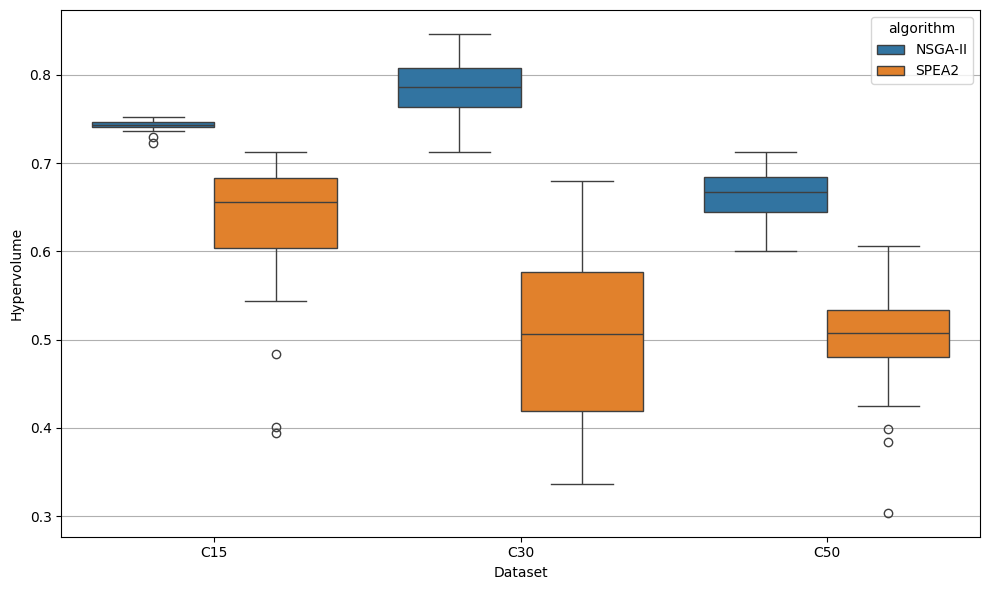

In [ ]:
# Boxplot hypervolume by dataset and algorithm
plt.figure(figsize=(10, 6))  # Điều chỉnh kích thước hình nếu cần
sns.boxplot(data=df, x='dataset', y='hypervolume', hue='algorithm')
# plt.title('Hypervolume Distribution by Dataset and Algorithm')
plt.xlabel('Dataset')
plt.ylabel('Hypervolume')
plt.xticks()
plt.grid(axis="y")
plt.tight_layout()
plt.show()

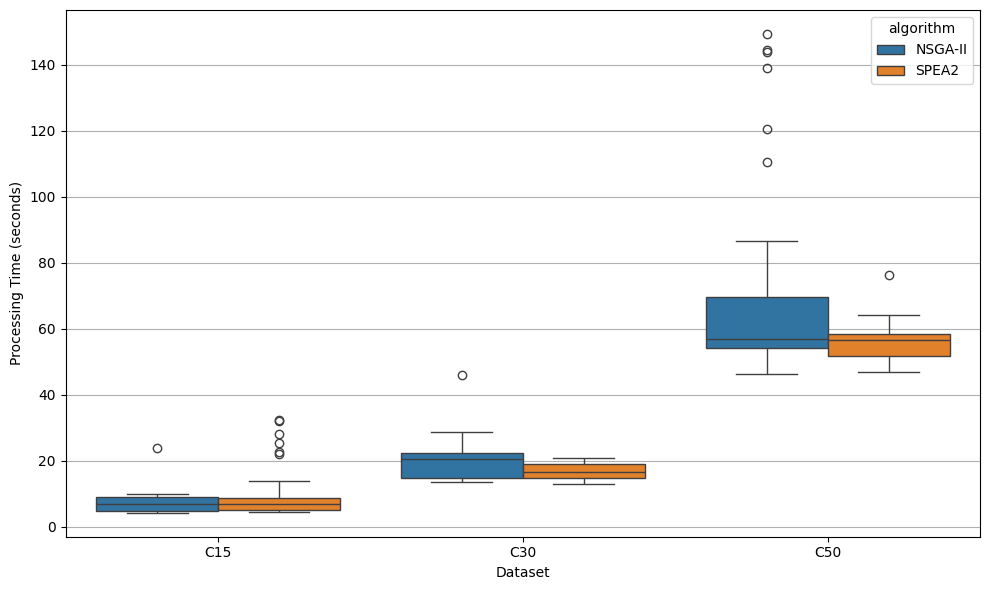

In [ ]:
# Boxplot run_time by dataset and algorithm
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='dataset', y='run_time', hue='algorithm')
# plt.title('Runtime Distribution by Dataset and Algorithm')
plt.xlabel('Dataset')
plt.ylabel('Processing Time (seconds)')
plt.xticks()
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [ ]:
# Compare mean, median, min, max of hypervolume, run_time, num_solution by algorithm
def compare_metrics(df, metrics):
    for metric in metrics:
        print(f"\nComparison of {metric} by Algorithm:")
        print(df.groupby('algorithm')[metric].agg(['mean', 'median', 'min', 'max']))

compare_metrics(df, ["hypervolume", "run_time", "num_solution"])

# Compare min, max, average of objectives by algorithm
def compare_objectives(df, objectives):
    for obj in objectives:
        print(f"\nComparison of {obj} by Algorithm:")
        print(df.groupby('algorithm')[obj].agg(['min', 'max', 'mean']))

compare_objectives(df, ["average_ob1", "average_ob2"])
compare_objectives(df, ["min_ob1", "min_ob2"])


Comparison of hypervolume by Algorithm:
               mean    median       min       max
algorithm                                        
nsga2      0.730237  0.742620  0.600542  0.846327
spea2      0.542390  0.535264  0.303913  0.712415

Comparison of run_time by Algorithm:
                mean     median       min         max
algorithm                                            
nsga2      33.499776  20.998883  4.223434  149.275135
spea2      27.930349  18.260128  4.406414   76.109278

Comparison of num_solution by Algorithm:
                mean  median  min  max
algorithm                             
nsga2      15.377778    15.5    6   25
spea2       1.933333     1.0    1   18

Comparison of average_ob1 by Algorithm:
                   min          max         mean
algorithm                                       
nsga2      1084.376406  2960.089711  2055.061299
spea2       963.163895  4421.308517  2397.127624

Comparison of average_ob2 by Algorithm:
                 min         

In [ ]:
# Compare mean and median of hypervolume by algorithm, num_gen, and dataset
def compare_hypervolume(df):
    grouped = df.groupby(['dataset', 'num_gen', 'algorithm'])['hypervolume']
    result = grouped.agg(['mean', 'median'])
    print(result)
    return result

compare_hypervolume(df)

                               mean    median
dataset num_gen algorithm                    
C15     50      nsga2      0.738605  0.738843
                spea2      0.663519  0.669732
        70      nsga2      0.744601  0.744103
                spea2      0.598291  0.617742
        90      nsga2      0.745764  0.744935
                spea2      0.622152  0.656288
C30     50      nsga2      0.756199  0.761227
                spea2      0.474545  0.429931
        70      nsga2      0.794260  0.798845
                spea2      0.525106  0.526529
        90      nsga2      0.806243  0.811923
                spea2      0.506716  0.506926
C50     50      nsga2      0.640078  0.638019
                spea2      0.524820  0.540570
        70      nsga2      0.665949  0.667034
                spea2      0.487918  0.486408
        90      nsga2      0.680428  0.687389
                spea2      0.478444  0.510671


mean    median
dataset num_gen algorithm                    
C15     50      nsga2      0.738605  0.738843
                spea2      0.663519  0.669732
        70      nsga2      0.744601  0.744103
                spea2      0.598291  0.617742
        90      nsga2      0.745764  0.744935
                spea2      0.622152  0.656288
C30     50      nsga2      0.756199  0.761227
                spea2      0.474545  0.429931
        70      nsga2      0.794260  0.798845
                spea2      0.525106  0.526529
        90      nsga2      0.806243  0.811923
                spea2      0.506716  0.506926
C50     50      nsga2      0.640078  0.638019
                spea2      0.524820  0.540570
        70      nsga2      0.665949  0.667034
                spea2      0.487918  0.486408
        90      nsga2      0.680428  0.687389
                spea2      0.478444  0.510671

In [9]:
# Compare mean and median of run time by algorithm, num_gen, and dataset
def compare_run_time(df):
    grouped = df.groupby(['dataset', 'num_gen', 'algorithm'])['run_time']
    result = grouped.agg(['mean', 'median'])
    print(result)
    return result

compare_run_time(df)

                                 mean      median
dataset num_gen algorithm                        
C15     50      NSGA-II      4.713382    4.710638
                SPEA2        4.976646    4.958305
        70      NSGA-II      7.003834    6.944448
                SPEA2        6.882700    6.750139
        90      NSGA-II     10.789521    9.463095
                SPEA2       20.229676   22.410080
C30     50      NSGA-II     14.218565   14.111612
                SPEA2       14.177433   14.315330
        70      NSGA-II     20.426007   20.649169
                SPEA2       16.674716   16.675415
        90      NSGA-II     25.488815   22.746030
                SPEA2       19.466741   19.808472
C50     50      NSGA-II     52.631451   53.366624
                SPEA2       51.565720   50.905728
        70      NSGA-II     59.259961   57.362557
                SPEA2       57.925331   55.636113
        90      NSGA-II    106.966450  115.513712
                SPEA2       59.474174   58.714724


mean      median
dataset num_gen algorithm                        
C15     50      NSGA-II      4.713382    4.710638
                SPEA2        4.976646    4.958305
        70      NSGA-II      7.003834    6.944448
                SPEA2        6.882700    6.750139
        90      NSGA-II     10.789521    9.463095
                SPEA2       20.229676   22.410080
C30     50      NSGA-II     14.218565   14.111612
                SPEA2       14.177433   14.315330
        70      NSGA-II     20.426007   20.649169
                SPEA2       16.674716   16.675415
        90      NSGA-II     25.488815   22.746030
                SPEA2       19.466741   19.808472
C50     50      NSGA-II     52.631451   53.366624
                SPEA2       51.565720   50.905728
        70      NSGA-II     59.259961   57.362557
                SPEA2       57.925331   55.636113
        90      NSGA-II    106.966450  115.513712
                SPEA2       59.474174   58.714724

In [ ]:
# Compare min, max, average of objectives by dataset and algorithm
def compare_objectives_by_dataset(df, objectives):
    for obj in objectives:
        print(f"\nComparison of {obj} by Dataset and Algorithm:")
        print(df.groupby(['dataset', 'algorithm'])[obj].agg(['mean']))

compare_objectives_by_dataset(df, ["average_ob1", "average_ob2"])
compare_objectives_by_dataset(df, ["min_ob1", "min_ob2"])


Comparison of average_ob1 by Dataset and Algorithm:
                          mean
dataset algorithm             
C15     nsga2      1190.501987
        spea2      1307.529462
C30     nsga2      2350.950750
        spea2      2693.341941
C50     nsga2      2623.731161
        spea2      3190.511469

Comparison of average_ob2 by Dataset and Algorithm:
                         mean
dataset algorithm            
C15     nsga2      276.683793
        spea2      324.966632
C30     nsga2      129.645390
        spea2      208.659460
C50     nsga2       78.220867
        spea2       73.764054

Comparison of min_ob1 by Dataset and Algorithm:
                          mean
dataset algorithm             
C15     nsga2       943.255861
        spea2      1213.207789
C30     nsga2      1732.990830
        spea2      2550.180009
C50     nsga2      2446.594710
        spea2      3080.659059

Comparison of min_ob2 by Dataset and Algorithm:
                         mean
dataset algorithm            


# Visualization


Grouped Bar Chart: Percentage of non-dominated solutions by dataset

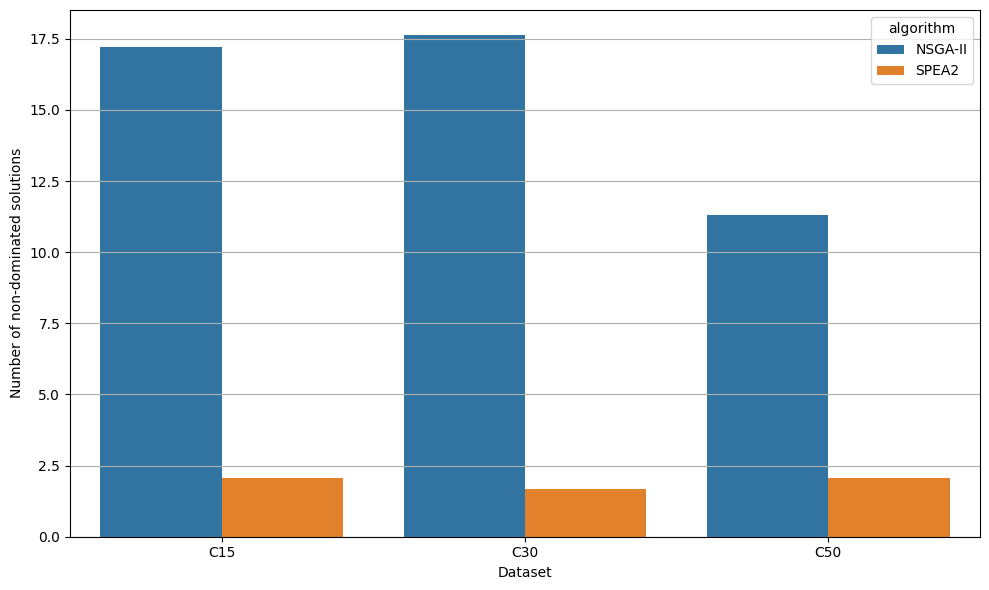

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="dataset", y="num_solution", hue="algorithm", errorbar=None)
# plt.title("Number of Non-dominated Solutions by Dataset and Algorithm")
plt.xlabel("Dataset")
plt.ylabel("Number of non-dominated solutions")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

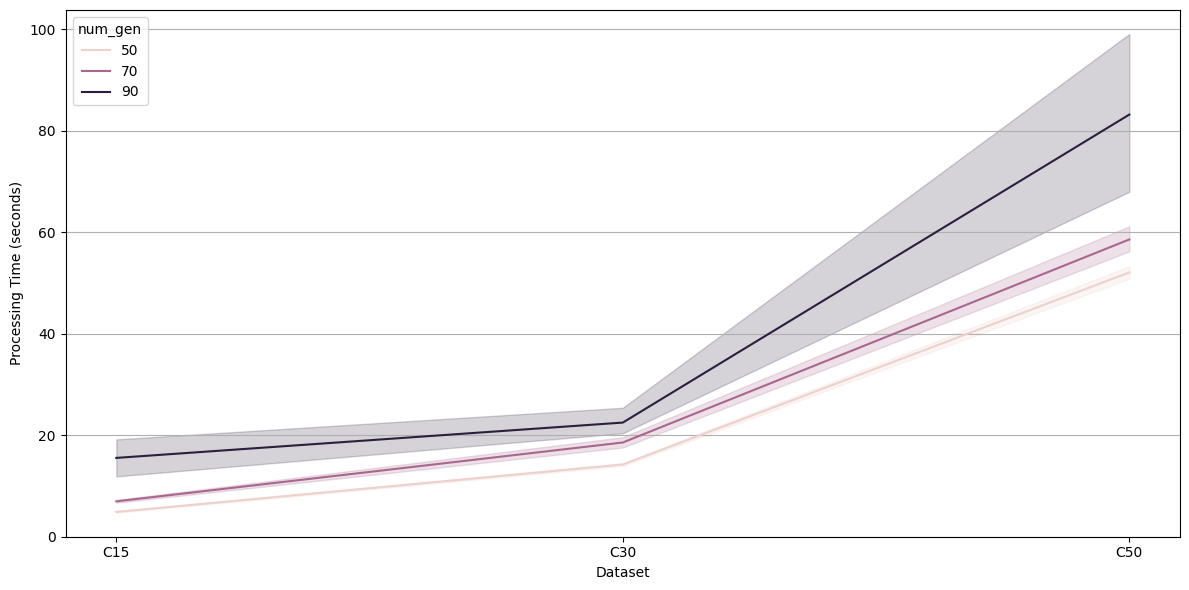

In [ ]:
# Line plot of run_time by dataset and num_gen
plt.figure(figsize=(12, 6))
sns.lineplot(x='dataset', y='run_time', hue='num_gen', data=df)
# plt.title('Processing time over dataset Number of Generations')
plt.xlabel('Dataset')
plt.ylabel('Processing Time (seconds)')
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [ ]:
# Find the rows with the maximum hypervolume for each algorithm
max_hv_rows = df.loc[df.groupby(['algorithm', 'dataset'])['hypervolume'].idxmax()]

max_hv = max_hv_rows[['algorithm', 'dataset', 'front', 'ob1', 'ob2', 'hypervolume']]
max_hv.to_excel("results\\comparison-results\\max_hv.xlsx", index=False)